In [1]:
import pandas as pd
import warnings

from matplotlib import pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# Adjusting for Data Frame Output
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [2]:
# Read Dataset
# Dataset Source:
#   https://www.kaggle.com/datasets/gauravduttakiit/white-wine-quality?select=Training_set_whitewine.csv
df_origin = pd.read_csv('dataset/white_wine.csv')

In [3]:
# Check data information
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3428 non-null   float64
 1   volatile acidity      3428 non-null   float64
 2   citric acid           3428 non-null   float64
 3   residual sugar        3428 non-null   float64
 4   chlorides             3428 non-null   float64
 5   free sulfur dioxide   3428 non-null   float64
 6   total sulfur dioxide  3428 non-null   float64
 7   density               3428 non-null   float64
 8   pH                    3428 non-null   float64
 9   sulphates             3428 non-null   float64
 10  alcohol               3428 non-null   float64
 11  quality               3428 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 321.5 KB


In [4]:
# Check Dataset
display(df_origin)

# Copying a data set from the original dataset
df = df_origin.copy()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.47,0.19,8.3,0.029,24.0,142.0,0.99200,3.22,0.45,12.30,6
1,6.8,0.38,0.29,9.9,0.037,40.0,146.0,0.99326,3.11,0.37,11.50,6
2,7.9,0.17,0.32,1.6,0.053,47.0,150.0,0.99480,3.29,0.76,9.60,6
3,7.6,0.30,0.27,10.6,0.039,31.0,119.0,0.99815,3.27,0.30,9.30,6
4,5.8,0.24,0.39,1.5,0.054,37.0,158.0,0.99320,3.21,0.52,9.30,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,8.0,0.25,0.13,17.2,0.036,49.0,219.0,0.99960,2.96,0.46,9.70,5
3424,6.1,0.16,0.34,6.1,0.034,31.0,114.0,0.99365,3.32,0.58,10.15,7
3425,6.0,0.24,0.33,2.5,0.026,31.0,85.0,0.99014,3.13,0.50,11.30,7
3426,6.5,0.22,0.45,8.0,0.053,52.0,196.0,0.99590,3.23,0.48,9.10,6


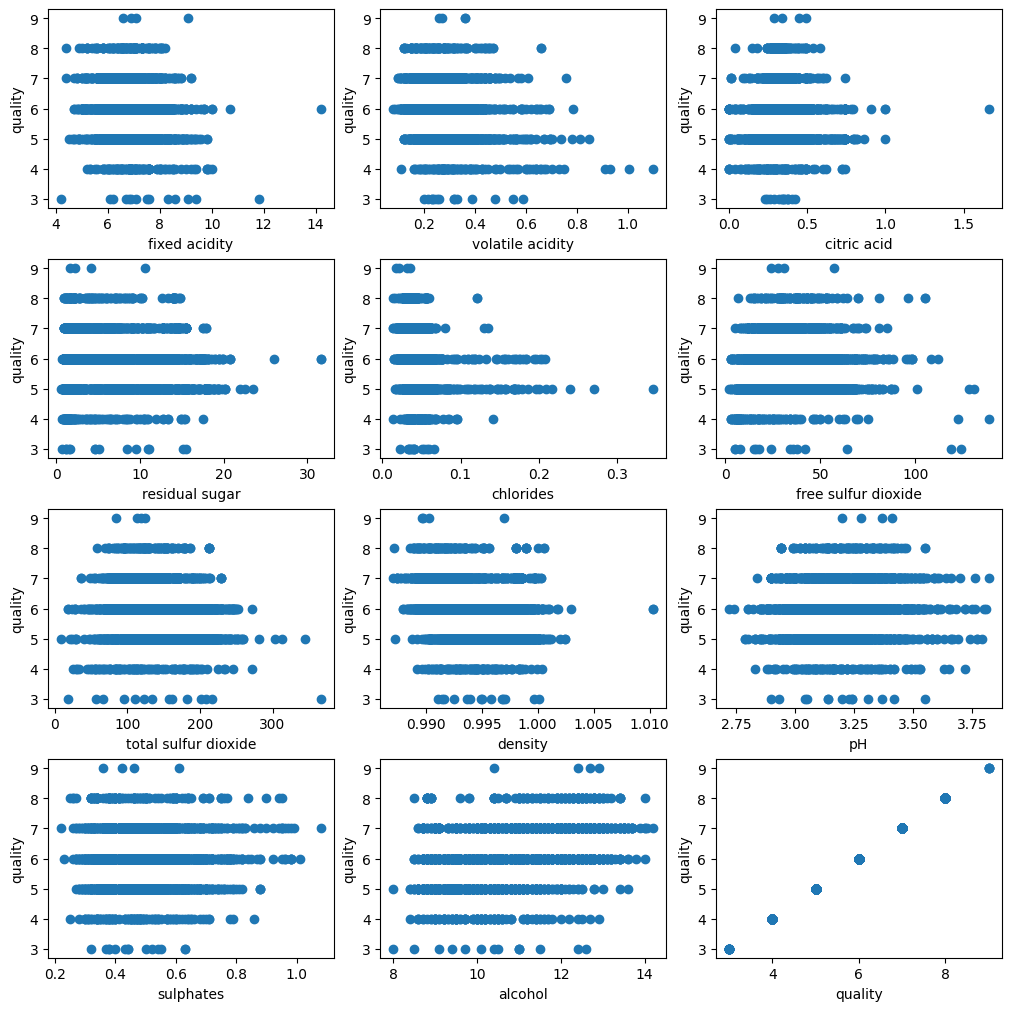

In [5]:
# Scatter plot
row_count = 4
col_count = 3
fig, axes = plt.subplots(row_count, col_count, constrained_layout=True, figsize=(10, 10))

for i in range(0, row_count):
    for j in range(0, col_count):
        k = i * col_count + j
        axes[i, j].set_xlabel(str(df.columns[k]))
        axes[i, j].set_ylabel('quality')
        axes[i, j].scatter(x=df.iloc[:, k], y=df.iloc[:, -1])

In [6]:
# Separating datasets by x & y
x = df.loc[:, ['fixed acidity','volatile acidity' ,'density', 'alcohol']]
y = df.loc[:, 'quality']

In [7]:
# Data Scaling
scalier = StandardScaler()
x = pd.DataFrame(scalier.fit_transform(x), columns=x.columns)

In [8]:
# Elastic Net
elastic_net = ElasticNet()
elastic_net_parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
elastic_net_regression = GridSearchCV(elastic_net, elastic_net_parameters, scoring='neg_mean_squared_error', cv=5)
elastic_net_regression.fit(x, y)

print('Elastic Net Regression Best parameter:', elastic_net_regression.best_params_)
print('Elastic Net Regression Best MSE:', elastic_net_regression.best_score_)

Elastic Net Regression Best parameter: {'alpha': 0.0001}
Elastic Net Regression Best MSE: -0.5830763255412295
